In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\sumit\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com

In [2]:
df=pd.read_csv('drugsComTrain_raw.csv')
df_test = pd.read_csv('drugsComTest_raw.csv')

In [3]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [5]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [7]:
df_test

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [9]:
def load_dataset(file_path, num_samples):
    df = pd.read_csv(file_path, usecols=[3, 4], nrows=num_samples)
    df.columns = ['review', 'rating']

    text = df['review'].tolist()
    text = [str(t).encode('ascii', 'replace') for t in text]
    text = np.array(text, dtype=object)[:]
    
    labels = df['rating'].tolist()
    labels = [1 if i>=7 else 0 if i>=5 else -1 for i in labels]
    labels = np.array(pd.get_dummies(labels), dtype=int)[:] 

    return labels, text

In [10]:
tmp_labels, tmp_text = load_dataset('drugsComTrain_raw.csv', 568454)
tmp_text.shape

(161297,)

In [11]:
tmp_text

array([b'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
       b'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."',
       b'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. B

In [12]:
data = pd.concat([df, df_test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [13]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [14]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [15]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

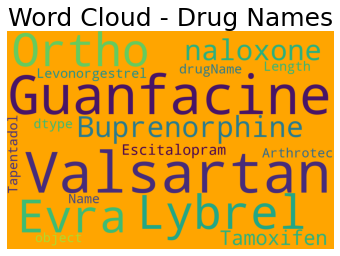

In [16]:


# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

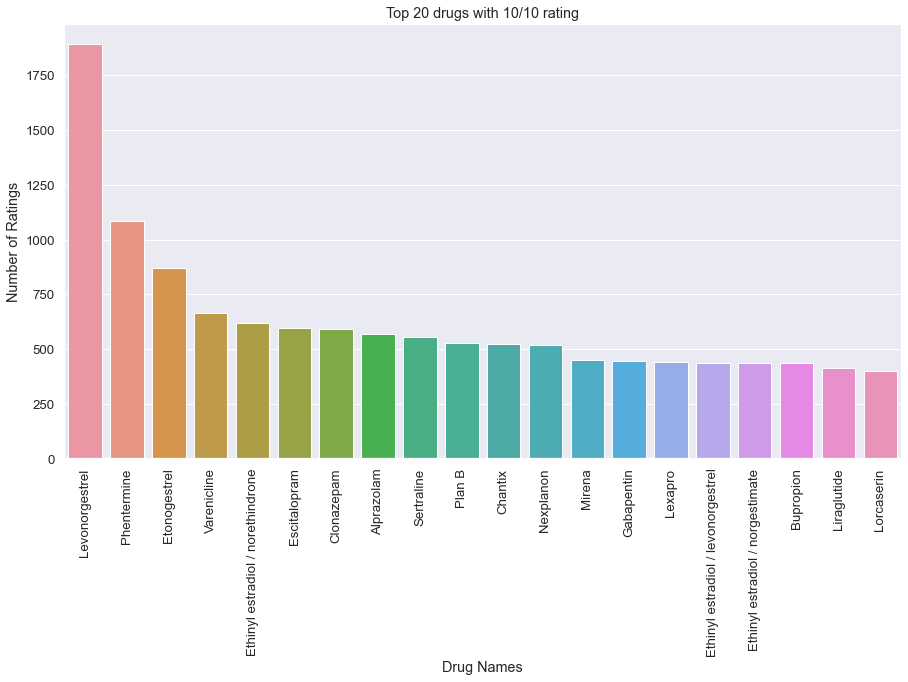

In [17]:
# This barplot shows the top 20 drugs with the 10/10 rating


sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

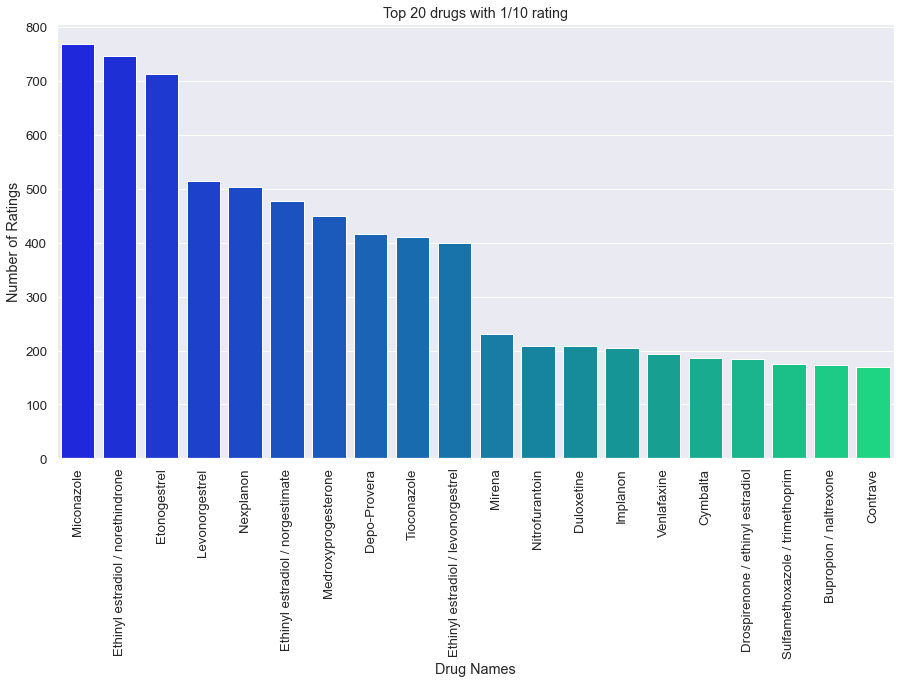

In [18]:
# This barplot shows the Top 20 drugs with the 1/10 rating

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

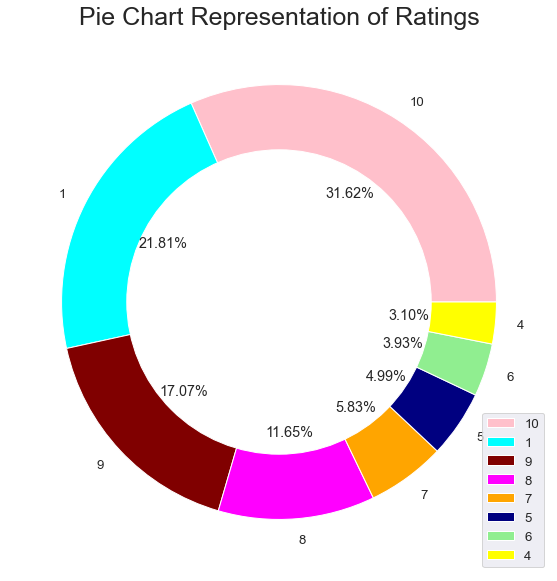

In [19]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

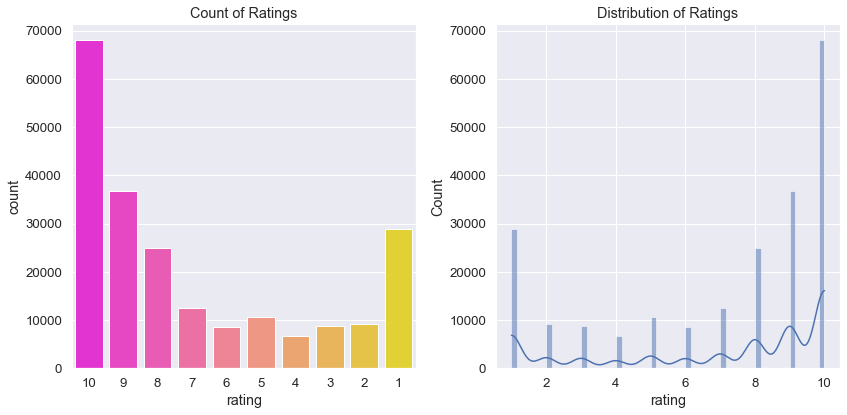

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# sns.countplot requires `data` to be a DataFrame, and the column should exist
sns_1 = sns.countplot(
    x='rating',
    data=data,
    palette='spring',
    order=list(range(10, 0, -1)),  # Ensure the ratings match this range
    ax=ax[0]
)
sns_1.set_title('Count of Ratings')

# sns.distplot is deprecated, use sns.histplot or sns.kdeplot instead
sns_2 = sns.histplot(data['rating'], kde=True, ax=ax[1])
sns_2.set_title('Distribution of Ratings')

plt.tight_layout()
plt.show()

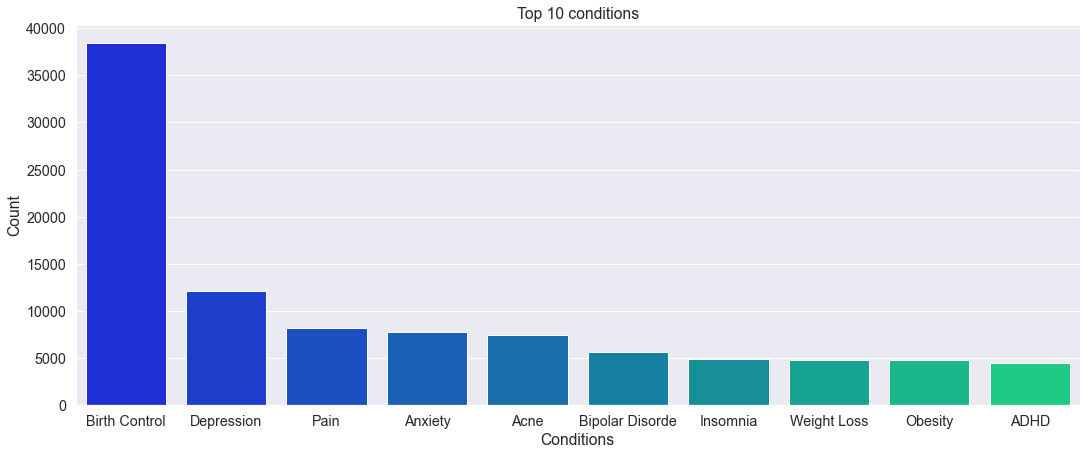

In [21]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

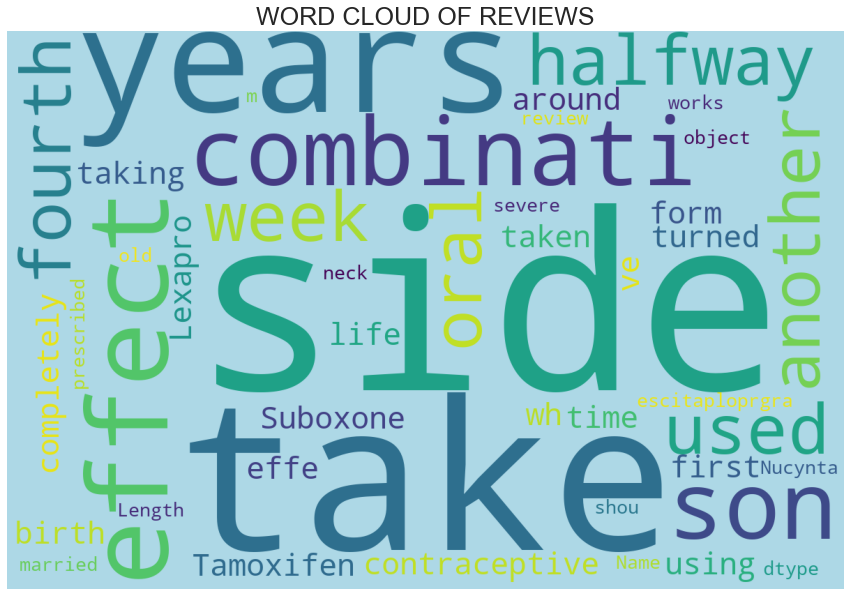

In [23]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [24]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

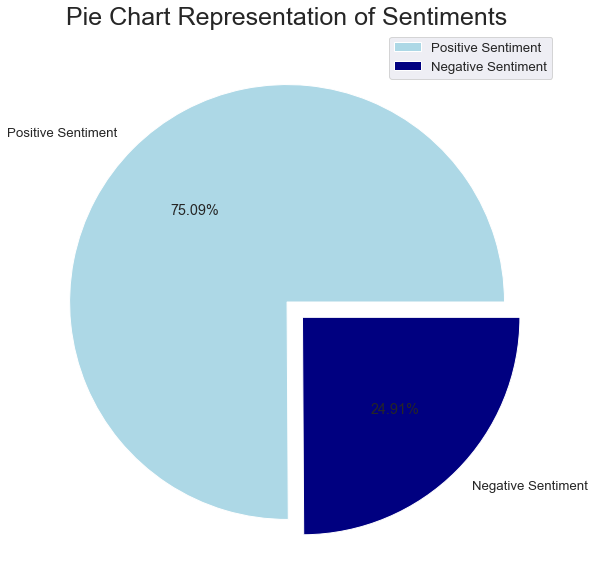

In [25]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

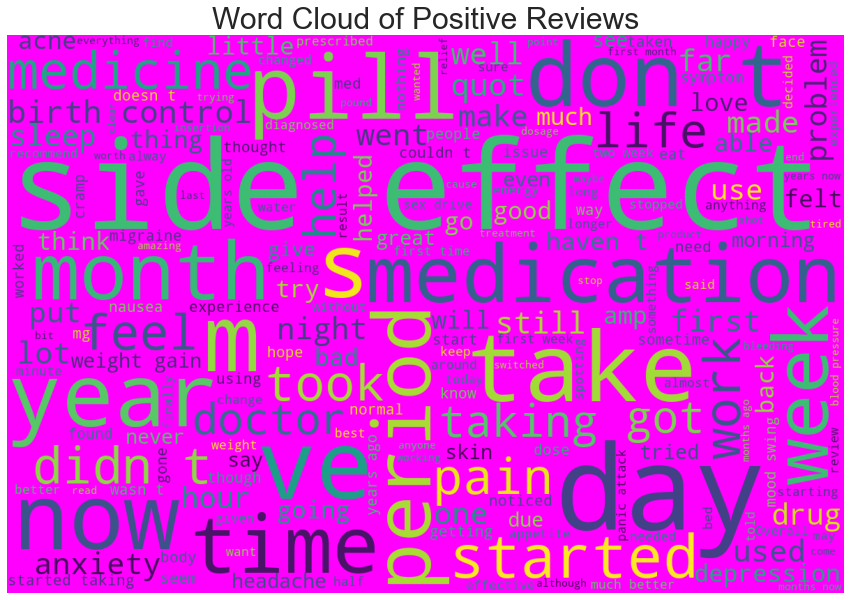

In [26]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

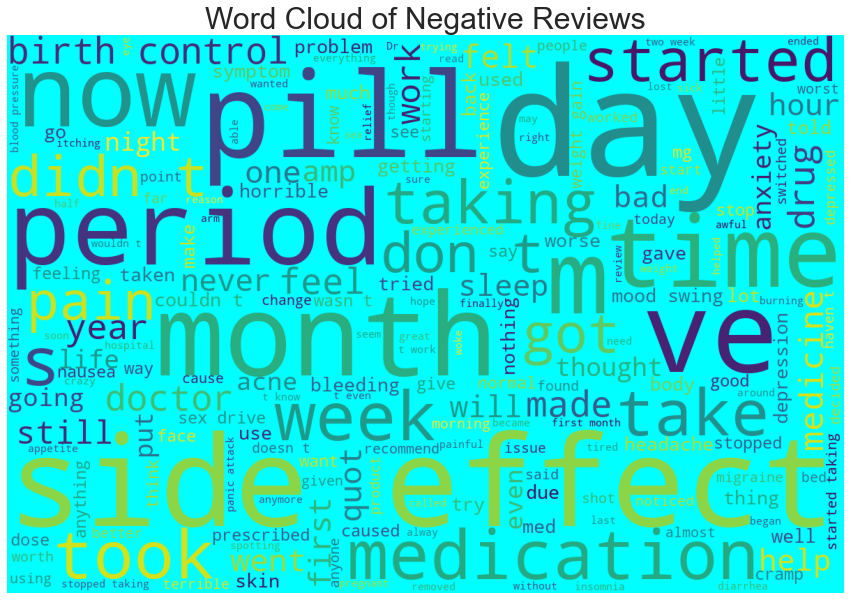

In [27]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [28]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

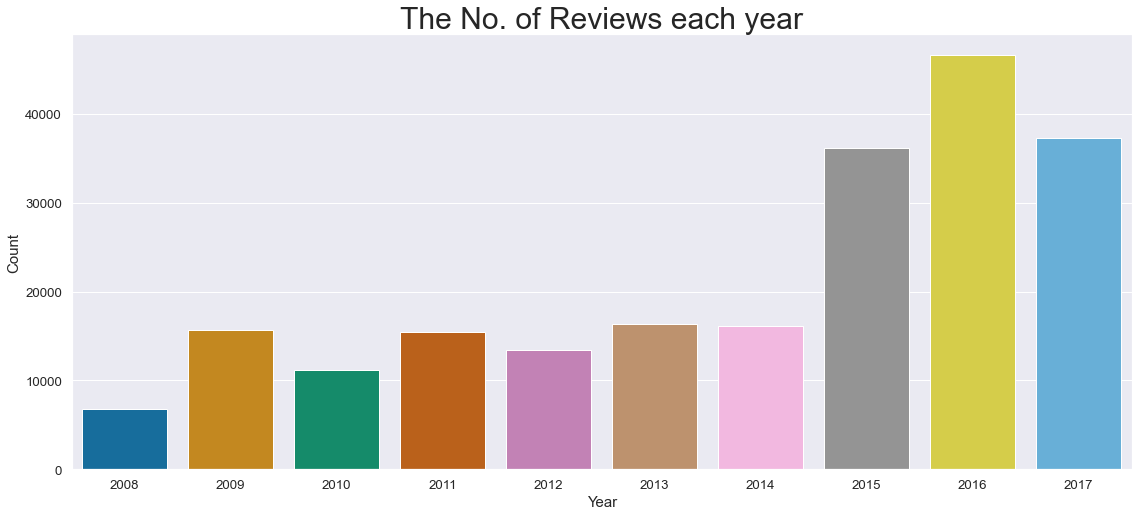

In [29]:
plt.rcParams['figure.figsize'] = (19, 8)

# Use x='Year' and pass the whole DataFrame to `data`
sns.countplot(x='Year', data=data, palette='colorblind')
plt.title('The No. of Reviews each year', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

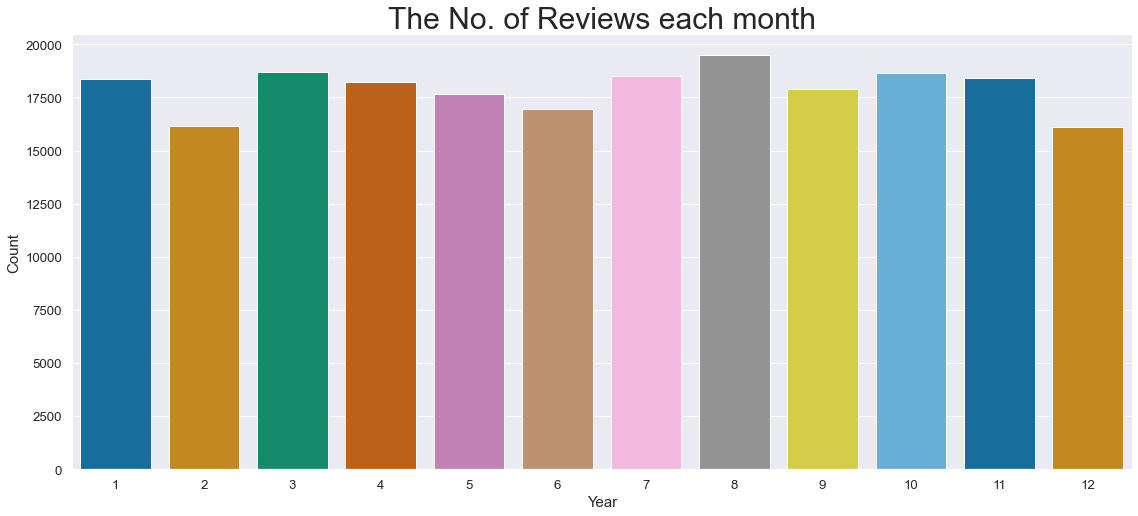

In [30]:
plt.rcParams['figure.figsize'] = (19, 8)

# Use x='Year' and pass the whole DataFrame to `data`
sns.countplot(x='month', data=data, palette='colorblind')
plt.title('The No. of Reviews each month', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

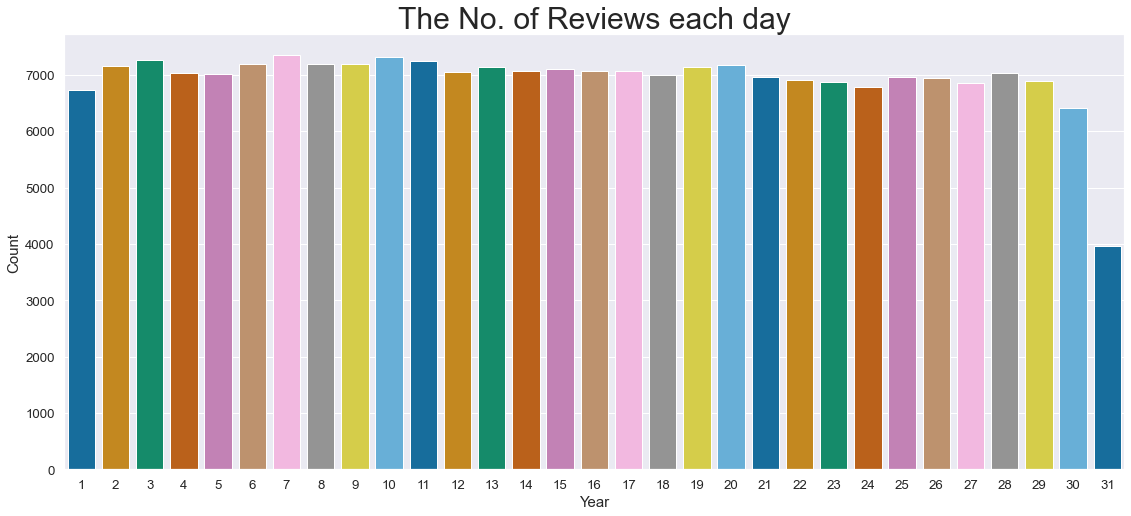

In [31]:
plt.rcParams['figure.figsize'] = (19, 8)

# Use x='Year' and pass the whole DataFrame to `data`
sns.countplot(x='day', data=data, palette='colorblind')
plt.title('The No. of Reviews each day', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

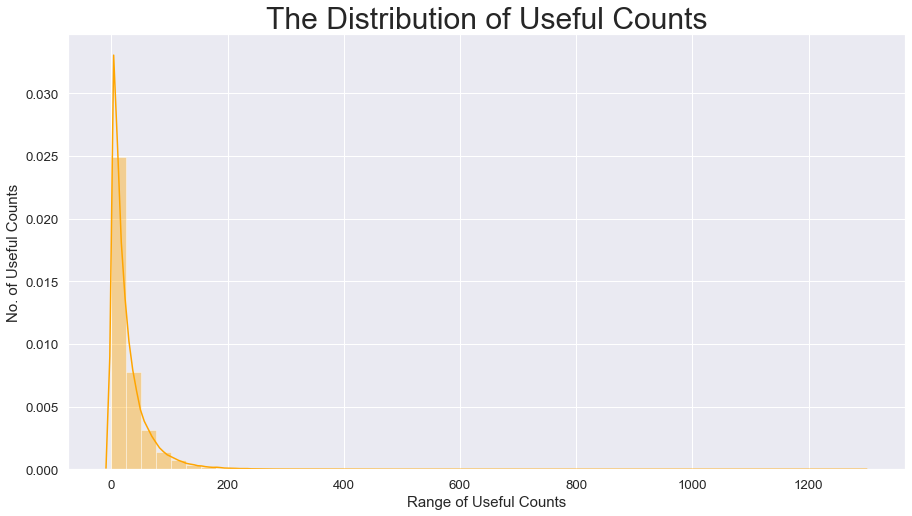

In [32]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [33]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [34]:
data['review_clean'] = review_clean(data['review'])

In [35]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [36]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [37]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time use form birth control im glad went...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxon complet turn life around feel healthie...


In [38]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [39]:

data['sentiment'] = sentiment(data['review'])
data['sentiment_clean'] = sentiment(data['review_clean'])
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])
data = data.dropna(how="any", axis=0)

In [40]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [41]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

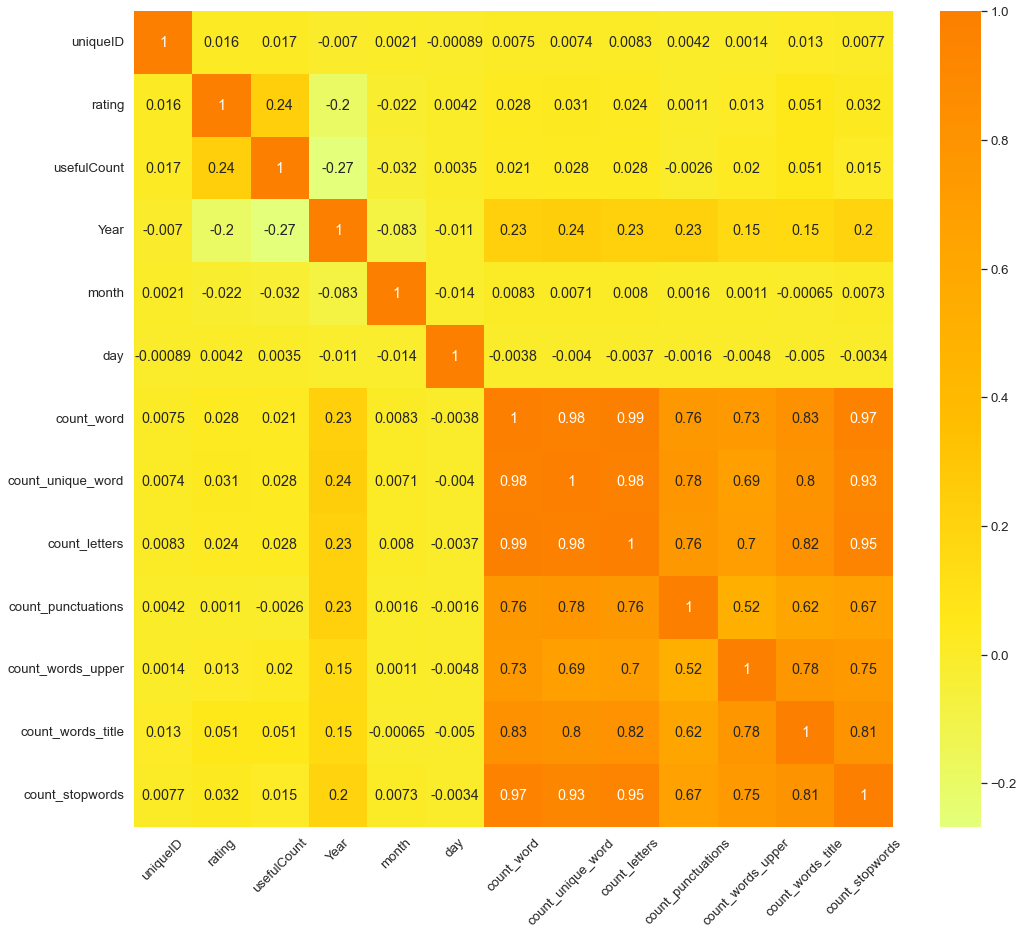

In [42]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [43]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [44]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [45]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


In [46]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.9014977946104331
The confusion Matrix is 


array([[11753,  4321],
       [ 1999, 46088]], dtype=int64)

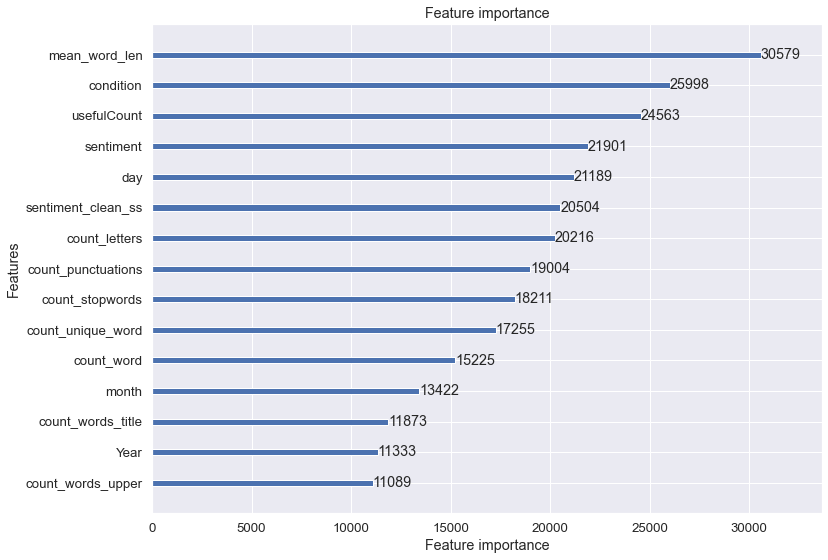

In [47]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

In [48]:
X_train

,condition,usefulCount,sentiment,day,month,Year,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
10159,176,19,0.000000,14,7,2016,0.000000,45,37,229,7,3,5,23,4.111111
38860,175,11,-0.064286,23,3,2016,-0.118750,66,54,356,30,0,2,25,4.409091
137821,175,14,-0.073672,14,5,2015,-0.073672,140,96,736,18,8,10,67,4.264286
85684,535,13,0.250000,12,2,2017,0.064286,82,68,448,16,5,6,30,4.475610
23173,225,33,-0.055556,6,9,2015,-0.055556,38,31,188,9,1,2,19,3.973684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120565,183,5,-0.070833,19,1,2016,-0.070833,29,25,157,15,1,2,12,4.448276
104291,451,6,0.000000,6,9,2016,0.000000,5,5,25,2,0,1,1,4.200000
132685,854,4,-0.286111,17,11,2017,-0.272222,104,78,538,17,8,10,45,4.182692
147709,547,3,-0.188889,6,7,2017,-0.188889,42,32,217,6,4,6,19,4.190476


In [49]:
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [116]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment', 'month', 
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 13)
The Test set size  (64161, 13)


In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [118]:
print(X_train.isnull().sum())  # For checking NaNs in X_train


condition             0
usefulCount           0
sentiment             0
month                 0
sentiment_clean_ss    0
count_word            0
count_unique_word     0
count_letters         0
count_punctuations    0
count_words_upper     0
count_words_title     0
count_stopwords       0
mean_word_len         1
dtype: int64


In [119]:
X_train['mean_word_len'].fillna(X_train['mean_word_len'].mean(),inplace=True)

In [120]:
print(X_train.isnull().sum())  # For checking NaNs in X_train


condition             0
usefulCount           0
sentiment             0
month                 0
sentiment_clean_ss    0
count_word            0
count_unique_word     0
count_letters         0
count_punctuations    0
count_words_upper     0
count_words_title     0
count_stopwords       0
mean_word_len         0
dtype: int64


In [121]:
print(y_train.isnull().sum())  # For checking NaNs in y_train


0


In [122]:
X_train

,condition,usefulCount,sentiment,month,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
10159,176,19,0.000000,7,0.000000,45,37,229,7,3,5,23,4.111111
38860,175,11,-0.064286,3,-0.118750,66,54,356,30,0,2,25,4.409091
137821,175,14,-0.073672,5,-0.073672,140,96,736,18,8,10,67,4.264286
85684,535,13,0.250000,2,0.064286,82,68,448,16,5,6,30,4.475610
23173,225,33,-0.055556,9,-0.055556,38,31,188,9,1,2,19,3.973684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120565,183,5,-0.070833,1,-0.070833,29,25,157,15,1,2,12,4.448276
104291,451,6,0.000000,9,0.000000,5,5,25,2,0,1,1,4.200000
132685,854,4,-0.286111,11,-0.272222,104,78,538,17,8,10,45,4.182692
147709,547,3,-0.188889,7,-0.188889,42,32,217,6,4,6,19,4.190476


In [123]:
X_test

,condition,usefulCount,sentiment,month,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
148619,87,41,0.028914,1,0.010859,99,69,509,14,8,17,50,4.151515
90835,192,6,-0.140278,10,-0.140278,79,59,421,11,6,6,36,4.341772
33530,399,41,0.000000,3,0.000000,12,12,62,6,0,1,2,4.250000
113551,87,3,-0.500000,9,-0.500000,24,19,121,6,0,2,7,4.083333
89748,454,68,-0.062500,3,-0.062500,57,42,254,9,4,9,25,3.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,581,42,0.218403,6,0.189236,56,49,259,17,5,12,21,3.642857
36210,176,29,-0.156250,4,-0.156250,32,28,162,5,1,4,13,4.093750
116363,399,40,-0.200000,8,-0.200000,76,60,353,10,4,4,43,3.657895
103492,175,106,0.031875,4,0.031875,109,85,631,14,6,9,47,4.798165


In [124]:
y_train

10159     0.0
38860     1.0
137821    1.0
85684     1.0
23173     1.0
         ... 
120565    0.0
104291    1.0
132685    0.0
147709    1.0
122658    1.0
Name: Review_Sentiment, Length: 149708, dtype: float64

In [125]:
y_test

148619    1.0
90835     0.0
33530     1.0
113551    0.0
89748     1.0
         ... 
103241    1.0
36210     0.0
116363    1.0
103492    0.0
47125     1.0
Name: Review_Sentiment, Length: 64161, dtype: float64

In [127]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression
])



In [128]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # You can try lowering this value
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [129]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
3743/3743 [==============================] - 7s 2ms/step - loss: 1.7519 - mae: 0.7897 - val_loss: 0.3374 - val_mae: 0.4250
Epoch 2/5
3743/3743 [==============================] - 7s 2ms/step - loss: 0.5883 - mae: 0.5440 - val_loss: 0.3852 - val_mae: 0.4501
Epoch 3/5
3743/3743 [==============================] - 7s 2ms/step - loss: 0.4469 - mae: 0.5170 - val_loss: 0.4024 - val_mae: 0.5042
Epoch 4/5
3743/3743 [==============================] - 7s 2ms/step - loss: 0.5719 - mae: 0.4724 - val_loss: 0.1820 - val_mae: 0.3767
Epoch 5/5
3743/3743 [==============================] - 7s 2ms/step - loss: 0.3107 - mae: 0.4310 - val_loss: 0.2487 - val_mae: 0.3447


In [130]:
X_test

,condition,usefulCount,sentiment,month,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
148619,87,41,0.028914,1,0.010859,99,69,509,14,8,17,50,4.151515
90835,192,6,-0.140278,10,-0.140278,79,59,421,11,6,6,36,4.341772
33530,399,41,0.000000,3,0.000000,12,12,62,6,0,1,2,4.250000
113551,87,3,-0.500000,9,-0.500000,24,19,121,6,0,2,7,4.083333
89748,454,68,-0.062500,3,-0.062500,57,42,254,9,4,9,25,3.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,581,42,0.218403,6,0.189236,56,49,259,17,5,12,21,3.642857
36210,176,29,-0.156250,4,-0.156250,32,28,162,5,1,4,13,4.093750
116363,399,40,-0.200000,8,-0.200000,76,60,353,10,4,4,43,3.657895
103492,175,106,0.031875,4,0.031875,109,85,631,14,6,9,47,4.798165


In [134]:
predictions_binary = (predictions > 0.5).astype(int)

# Display the first 5 predictions vs actual values
print("Predicted values:", predictions_binary[:5].flatten())
print("Actual values:", y_test[:5])

Predicted values: [1 1 1 1 1]
Actual values: 148619    1.0
90835     0.0
33530     1.0
113551    0.0
89748     1.0
Name: Review_Sentiment, dtype: float64


In [135]:
y_test

148619    1.0
90835     0.0
33530     1.0
113551    0.0
89748     1.0
         ... 
103241    1.0
36210     0.0
116363    1.0
103492    0.0
47125     1.0
Name: Review_Sentiment, Length: 64161, dtype: float64

In [137]:
predictions_binary

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [144]:
len(y_test),len(predictions_binary)

(64161, 64161)

In [140]:
y_test

148619    1.0
90835     0.0
33530     1.0
113551    0.0
89748     1.0
         ... 
103241    1.0
36210     0.0
116363    1.0
103492    0.0
47125     1.0
Name: Review_Sentiment, Length: 64161, dtype: float64

In [161]:
predictions_binary

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [146]:
len(predictions_binary)

64161

In [163]:
p=[]
for i in predictions_binary:
    p.append(i[0])

In [150]:
type(p),type(y_test)

(list, pandas.core.series.Series)

In [151]:
yt = y_test.tolist()

In [156]:
for i in range(len(yt)):
    yt[i]=int(yt[i])
    

In [166]:
def compare_lists(list1, list2):
    # Ensure the lists have the same length
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")

    # Count how many elements are the same in both lists
    same_count = sum([1 for a, b in zip(list1, list2) if a == b])

    # Calculate the similarity percentage
    similarity_percentage = (same_count / len(list1)) * 100
    return similarity_percentage





In [167]:
# Calculate similarity
similarity = compare_lists(yt, p)
print(f"Similarity Percentage: {similarity:.2f}%")


Similarity Percentage: 75.66%
